In [243]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import random
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [207]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [208]:
#create a datatframe
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y

In [209]:
df.head()

,col1,col2,col3,col4,col5,target
0,-0.555449,-1.244049,0.775083,1.879430,1.702091,0
1,-0.990415,1.103971,0.846685,0.710740,-1.107503,1
2,-2.279084,-0.546716,-1.392292,0.338728,0.832087,0
3,-0.828334,1.789184,0.860571,1.135842,-0.607787,1
4,-0.857352,1.306483,1.453974,1.696353,-1.935700,1


In [210]:
df.shape

(100, 6)

In [211]:
#function for row sampling
def row_sample(df,percent):
    return df.sample(int(percent*df.shape[0]))

In [212]:
row_sample(df,0.1)

,col1,col2,col3,col4,col5,target
43,-2.085993,1.616767,2.246921,2.173056,0.546747,1
65,-0.008012,-2.924251,0.957284,2.732064,0.601101,0
99,-3.100068,-1.097623,2.181101,0.675163,2.585724,1
31,-1.548909,-0.368744,0.427506,-0.499529,-1.492713,1
54,-1.243830,0.048666,2.659178,2.580718,-1.082354,1
60,-1.720472,-0.707825,3.019074,2.467088,-0.552129,1
46,0.111609,1.090784,1.242044,1.942676,-1.819953,1
7,-4.548195,-3.352286,-0.616386,2.785465,1.864104,0
16,-4.643135,-0.380490,-3.101145,0.225375,2.344149,0
42,-3.451526,-2.407719,5.088571,3.361450,2.021921,1


In [213]:
df.columns.tolist()

['col1', 'col2', 'col3', 'col4', 'col5', 'target']

In [214]:
#function for column sampling
def col_sample(df,percent):
    value=int(percent*df.shape[1]-1)
    cols=random.sample(df.columns.tolist()[:-1],value)
    new_df=df[cols]
    new_df['target']=df['target']
    return new_df

In [215]:
col_sample(df,0.5)

C:\Users\Althaf B\AppData\Local\Temp\ipykernel_872\3229712771.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


,col5,col4,target
0,1.702091,1.879430,0
1,-1.107503,0.710740,1
2,0.832087,0.338728,0
3,-0.607787,1.135842,1
4,-1.935700,1.696353,1
...,...,...,...
95,0.906966,-1.360946,1
96,-0.236198,-0.101846,0
97,-0.039288,-0.212347,0
98,-0.004140,3.277322,1


In [216]:
#function for combined sampling
def comb_sample(df,row_percent,col_percent):
    new_df=row_sample(df,row_percent)
    return col_sample(new_df,col_percent)

In [218]:
comb_sample(df,0.1,0.5)

C:\Users\Althaf B\AppData\Local\Temp\ipykernel_872\3229712771.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


,col2,col4,target
26,0.279745,0.987100,1
60,-0.707825,2.467088,1
97,0.418534,-0.212347,0
19,0.968674,0.949597,1
51,-0.633620,-0.354940,0
87,0.027390,0.344806,0
72,-0.090160,1.446376,0
78,0.492763,0.393673,0
62,2.174466,-0.282636,1
18,0.263709,2.510961,1


Create different dataframes using the above defined functions

In [231]:
df1=comb_sample(df,1,1)
df2=comb_sample(df,1,1)
df3=comb_sample(df,1,1)

In [232]:
df1.head()

,col1,col2,col4,col3,col5,target
83,-1.286203,1.035896,0.236336,-2.431434,1.629736,0
94,-1.112916,0.144340,-1.708924,-0.963814,-0.635402,1
40,-0.483934,-0.678531,1.707434,1.439214,-2.302192,1
24,-0.243903,-1.374468,0.731717,-1.645373,0.879172,0
72,-1.024234,-0.090160,1.446376,-2.528083,1.640158,0


In [233]:
df2.head()

,col1,col2,col3,col5,col4,target
4,-0.857352,1.306483,1.453974,-1.935700,1.696353,1
51,0.642791,-0.633620,0.091048,-0.452273,-0.354940,0
20,-0.848215,-1.444278,-1.281988,0.922578,1.431914,0
10,1.248004,-1.713183,0.150342,0.412761,2.105059,0
43,-2.085993,1.616767,2.246921,0.546747,2.173056,1


In [234]:
df3.head()

,col1,col5,col3,col2,col4,target
60,-1.720472,-0.552129,3.019074,-0.707825,2.467088,1
18,-1.963958,0.512006,2.634269,0.263709,2.510961,1
5,-0.911380,-0.562912,1.857439,1.526934,1.927980,1
13,-1.234030,2.288684,-2.068123,-0.933652,2.103475,0
15,-0.780205,-1.202110,1.115870,2.149401,1.291520,1


In [235]:
#create the classifier objects
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

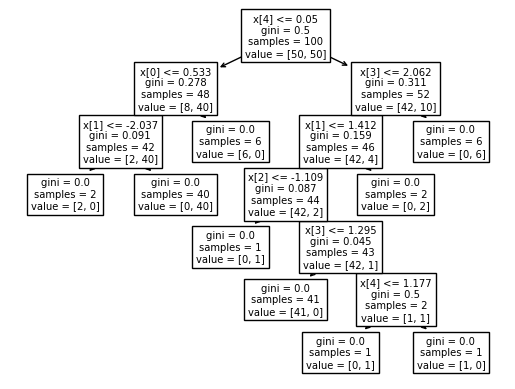

In [244]:
#plot the tree
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
plot_tree(clf1)
plt.show()

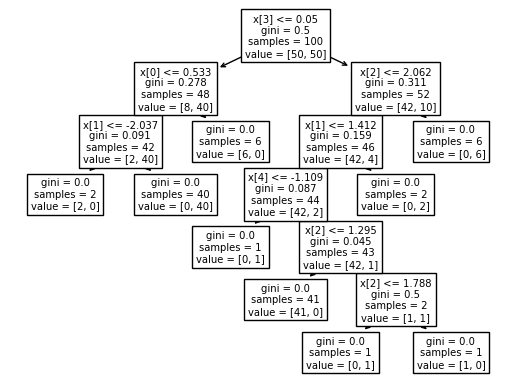

In [245]:
#plot the tree for clf2
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
plot_tree(clf2)
plt.show()

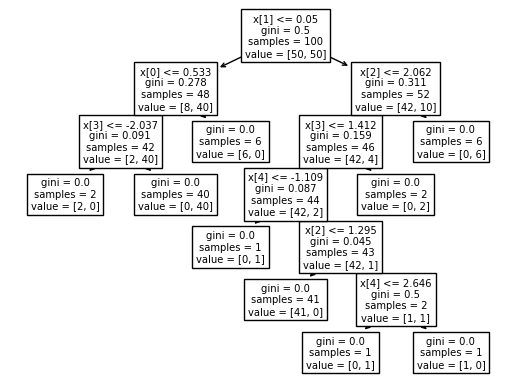

In [246]:
#plot the tree for clf3
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])
plot_tree(clf3)
plt.show()

In [248]:
df1.head()

,col1,col2,col4,col3,col5,target
83,-1.286203,1.035896,0.236336,-2.431434,1.629736,0
94,-1.112916,0.144340,-1.708924,-0.963814,-0.635402,1
40,-0.483934,-0.678531,1.707434,1.439214,-2.302192,1
24,-0.243903,-1.374468,0.731717,-1.645373,0.879172,0
72,-1.024234,-0.090160,1.446376,-2.528083,1.640158,0


Find the prediction made by every model for a input query point

In [252]:
#prediction made by the first decision tree
clf1.predict(np.array([-1.286203,	1.035896,	0.236336,	-2.431434,	1.629736	]).reshape(1,5))

c:\Users\Althaf B\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [253]:
#prediction made by the second decision tree
clf2.predict(np.array([-1.286203,	1.035896,	0.236336,	-2.431434,	1.629736	]).reshape(1,5))

c:\Users\Althaf B\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [254]:
#prediction made by the third decision tree
clf3.predict(np.array([-1.286203,	1.035896,	0.236336,	-2.431434,	1.629736	]).reshape(1,5))

c:\Users\Althaf B\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
"since two trees tell the output is 0 , so according to majority 0 is the output"

Hyper Parameter tuning using Gridsearchcv

In [255]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [256]:
df_new=pd.read_csv('heart.csv')

In [260]:
X=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [261]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [262]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [264]:
y_pred=rf.predict(X_test)

In [263]:
from sklearn.metrics import accuracy_score

In [267]:
print(f'The accuracy score is {accuracy_score(y_test,y_pred)*100}%')

The accuracy score is 100.0%


In [269]:
#using gridsearchcv
n_estimators=[20,40,60,100,140]
max_features=[0.2,0.3,0.4,0.8,1.0]
max_depth=[2,6,8,10,None]
max_samples=[0.5,0.75,1.0]

In [270]:
params_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,\
    "max_samples":max_samples}

In [271]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=rf,param_grid=params_grid,cv=10,verbose=2,n_jobs=-1)

In [272]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 8, 10, None],
                         'max_features': [0.2, 0.3, 0.4, 0.8, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 40, 60, 100, 140]},
             verbose=2)

In [273]:
#best parameters
grid.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.75,
 'n_estimators': 40}

In [274]:
#best parameters
grid.best_score_

0.9914634146341463